In [6]:
import zipfile
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler


from neural_network import DenseLayer, NeuralNetwork

data_path = Path("data")
with zipfile.ZipFile(data_path / "digit-recognizer.zip", "r") as zip_ref:
    zip_ref.extractall("data")

In [7]:
# Carregando e processando os dados
train = pd.read_csv(data_path / "train.csv")
X_train = train.iloc[:, 1:].values / 255.0  # Normalização simples
Y_train = train.iloc[:, 0].values.reshape(-1, 1)  # type: ignore

# One-hot encoding das labels
Y_train = np.eye(10)[
    Y_train.flatten()
].T  # One-hot encode e transpose para (n_classes, n_samples)

# Normalização dos dados de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).T  # Transpor para (n_features, n_samples)

In [8]:
# Inicializa a rede neural
nn = NeuralNetwork()

# Definir as camadas da rede neural
layers = [
    DenseLayer(input_size=784, output_size=128, activation="relu"),
    DenseLayer(input_size=128, output_size=64, activation="relu"),
    DenseLayer(input_size=64, output_size=10, activation="softmax"),
]

for layer in layers:
    nn.add_layer(layer)

In [9]:
# Treinamento da rede neural
nn.train(
    X_train,
    Y_train,
    epochs=35,
    learning_rate=0.31,
    cost_function="cross_entropy",
    batch_size=64,
    verbose_freq=5,
)

Epoch 0, Cost: 3.191427373424325, Accuracy: 25.69%
Epoch 5, Cost: 1.9767107844276965, Accuracy: 61.61%
Epoch 10, Cost: 0.9342281811949328, Accuracy: 84.91%
Epoch 15, Cost: 0.6863550159211198, Accuracy: 88.71%
Epoch 20, Cost: 0.5941095627791009, Accuracy: 90.27%
Epoch 25, Cost: 0.5348368748518596, Accuracy: 91.38%
Epoch 30, Cost: 0.49596785660116854, Accuracy: 92.10%


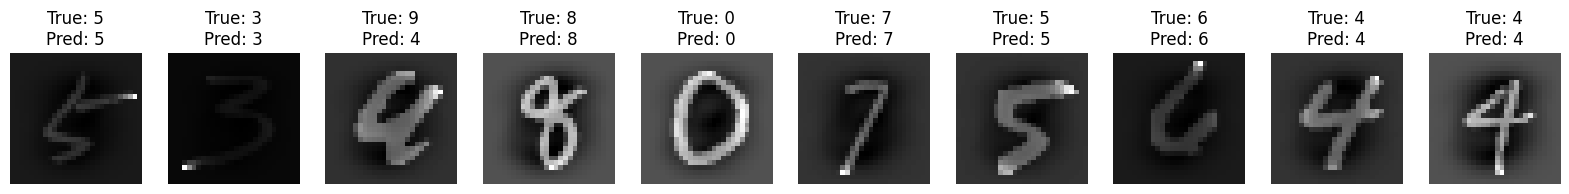

In [11]:
# Fazer previsões
predictions = nn.predict(X_train)

# Visualizar algumas imagens e suas previsões
def plot_images(X, y_true, y_pred, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 2))
    for i in range(num_images):
        ax = axes[i] # type: ignore
        ax.imshow(X[:, i].reshape(28, 28), cmap='gray')
        ax.set_title(f'True: {np.argmax(y_true[:, i])}\nPred: {y_pred[i]}')
        ax.axis('off')
    plt.show()

# Selecionar algumas imagens para exibir
num_images = 10
indices = np.random.choice(X_train.shape[1], num_images, replace=False)
X_sample = X_train[:, indices]
Y_sample = Y_train[:, indices]
pred_sample = predictions[indices]

# Mostrar as imagens e as previsões
plot_images(X_sample, Y_sample, pred_sample, num_images=num_images)